# **Image Recognition**
### **Abdallah Fekry**
**Model 1**

**(Medical imaging, Medical Test Reports, Food,or Other)**


---

# Data Exploration

In [1]:
import os
import shutil
from pathlib import Path

Create main folder

In [2]:
Path('/kaggle/working/images').mkdir(parents=True, exist_ok=True)

create food class folder

In [3]:
Path('/kaggle/working/images/food').mkdir(parents=True, exist_ok=True)

create medical imaging class folder

In [4]:
Path('/kaggle/working/images/medical').mkdir(parents=True, exist_ok=True)

create other objects class folder

In [5]:
Path('/kaggle/working/images/other').mkdir(parents=True, exist_ok=True)

create reports class folder

In [6]:
Path('/kaggle/working/images/report').mkdir(parents=True, exist_ok=True)

---

Copy from Food 101 dataset

In [7]:
path = "/kaggle/input/food-101/food-101/food-101/images/"
s = os.listdir(path)

In [8]:
s.sort()
s = s[1:]

In [9]:
len(s)

101

In [10]:
for i in range(len(s)):
    images = os.listdir(f"/kaggle/input/food-101/food-101/food-101/images/{s[i]}")
    for j in range(10):
        shutil.copy(f"/kaggle/input/food-101/food-101/food-101/images/{s[i]}/{images[j]}", "/kaggle/working/images/food")

---

Copy from Image Net dataset

In [11]:
path = "/kaggle/input/imagenetmini-1000/imagenet-mini/val"
s = os.listdir(path)

In [12]:
s.sort()

In [13]:
len(s)

1000

In [14]:
for i in range(len(s)):
    images = os.listdir(f"{path}/{s[i]}")
    for j in range(len(images)):
        shutil.copy(f"{path}/{s[i]}/{images[j]}", "/kaggle/working/images/other/")

---

Copy from Medical Imaging Scan dataset

In [15]:
path = "/kaggle/input/medical-imaging-scan-type-classification"
s = os.listdir(path)

In [16]:
s.sort()

In [17]:
len(s)

4

In [18]:
for i in range(len(s)):
    images = os.listdir(f"{path}/{s[i]}")
    for j in range(400):
        shutil.copy(f"{path}/{s[i]}/{images[j]}", "/kaggle/working/images/medical/")

---

copy from reports dataset

In [21]:
path = "/kaggle/input/reports-images/Reports"
s = os.listdir(path)

In [25]:
len(s)

62

In [28]:
s.remove('New folder')

In [29]:
len(s)

61

In [30]:
s.sort()

In [32]:
for i in range(len(s)):
    shutil.copy(f"{path}/{s[i]}", "/kaggle/working/images/report/")

---

Save data as zip file

In [101]:
shutil.make_archive("/kaggle/working/images", 'zip', "/kaggle/working/images")

'/kaggle/working/images.zip'

In [102]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'images.zip')

/kaggle/working


/kaggle/working/images.zip

---

In [33]:
!pip install keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.0 MB/s eta 0:00:0000:010:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [35]:
import keras
keras.__version__

'2.15.0'

importing libraries

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

# Loading Final Version Data

### Classes

Class 0 -> Food

Class 1 -> Medical Imaging

Class 2 -> Other

Class 3 -> Reports

In [37]:
classes = {0:"Food",
           1:"Medical Imaging Scan",
           2:"Other Unsupported Image!",
           3:"Medical Test Reports"}

In [38]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_data = train_datagen.flow_from_directory('/kaggle/working/images',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('/kaggle/working/images',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False,
                                              subset='validation')

Found 5606 images belonging to 4 classes.
Found 988 images belonging to 4 classes.


In [39]:
train_data.image_shape

(224, 224, 3)

In [40]:
np.unique(test_data.labels)

array([0, 1, 2, 3], dtype=int32)

In [41]:
train_data.class_indices

{'food': 0, 'medical': 1, 'other': 2, 'report': 3}

# Modeling

In [42]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [43]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [44]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 16388     
                                                                 
Total params: 134276932 (512.23 MB)
Trainable params: 11

## Train

In [45]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

results = model.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)
                  )

Epoch 1/50


I0000 00:00:1735267276.908344     154 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


176/176 [==============================] - 56s 247ms/step - loss: 1.1650 - accuracy: 0.8848 - val_loss: 0.2782 - val_accuracy: 0.9119
Epoch 2/50
176/176 [==============================] - 34s 196ms/step - loss: 0.1114 - accuracy: 0.9633 - val_loss: 0.3339 - val_accuracy: 0.8866
Epoch 3/50
176/176 [==============================] - 39s 223ms/step - loss: 0.0681 - accuracy: 0.9745 - val_loss: 0.3435 - val_accuracy: 0.9150
Epoch 4/50
176/176 [==============================] - 40s 225ms/step - loss: 0.0519 - accuracy: 0.9809 - val_loss: 0.3666 - val_accuracy: 0.9109
Epoch 5/50
176/176 [==============================] - 39s 221ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.3078 - val_accuracy: 0.9342
Epoch 6/50
176/176 [==============================] - 39s 220ms/step - loss: 0.0196 - accuracy: 0.9927 - val_loss: 0.5848 - val_accuracy: 0.9160
Epoch 7/50
176/176 [==============================] - 39s 221ms/step - loss: 0.0325 - accuracy: 0.9888 - val_loss: 0.3483 - val_accuracy: 0.9

## Retraining

In [46]:
# from keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

# results2 = model.fit(train_data, epochs=50, validation_data=test_data,
#                   steps_per_epoch=len(train_data), validation_steps=len(test_data),
#                   callbacks=EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)
#                   )

In [47]:
train_loss, train_acc = model.evaluate(train_data)

176/176 [==============================] - 30s 168ms/step - loss: 0.0042 - accuracy: 0.9988


In [48]:
print("Training Values")
print('Train accuracy = ',round(train_acc*100,2),'%\nLoss = ',train_loss ,sep='')

Training Values
Train accuracy = 99.88%
Loss = 0.004245589952915907


In [49]:
loss, acc = model.evaluate(test_data)

31/31 [==============================] - 6s 182ms/step - loss: 0.3483 - accuracy: 0.9433


In [50]:
print("Testing Values")
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss ,sep='')

Testing Values
Test accuracy = 94.33%
Loss = 0.3483433425426483


In [51]:
results.history['val_loss']

[0.2782074213027954,
 0.3338794708251953,
 0.34353557229042053,
 0.3665907382965088,
 0.30780768394470215,
 0.5848487615585327,
 0.3483433425426483,
 0.4296482503414154,
 0.4001753330230713,
 0.6242509484291077,
 0.43712398409843445,
 0.49080756306648254]

In [52]:
results.history['val_accuracy']

[0.9119433164596558,
 0.8866396546363831,
 0.9149797558784485,
 0.9109311699867249,
 0.9342105388641357,
 0.9159919023513794,
 0.9433198571205139,
 0.9362348318099976,
 0.942307710647583,
 0.897773265838623,
 0.9271255135536194,
 0.9362348318099976]

In [53]:
i = results.history['val_loss'].index(loss)
i

6

In [54]:
results.history['val_accuracy'][i]

0.9433198571205139

# Parameters Visualization

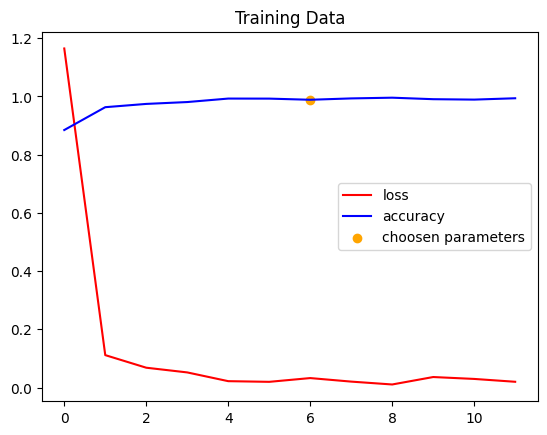

In [55]:
fig = plt.figure()
plt.plot(results.history['loss'], c='red', label='loss')
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
plt.scatter(i ,results.history['accuracy'][i], c='orange', label='choosen parameters', marker='o')
plt.title("Training Data")
plt.legend(loc="center right")
plt.show()

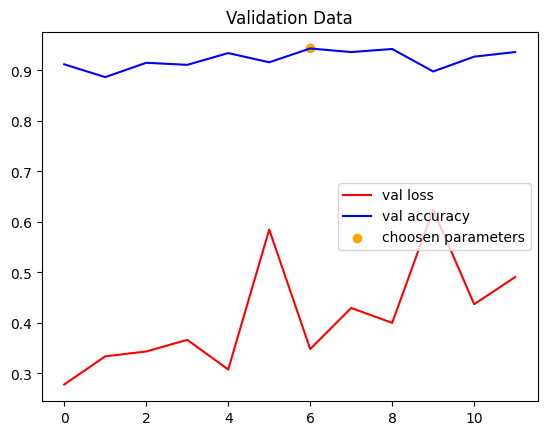

In [56]:
fig = plt.figure()
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.scatter(i ,results.history['val_accuracy'][i], c='orange', label='choosen parameters', marker='o')
plt.title("Validation Data")
plt.legend(loc="center right")
plt.show()

In [57]:
yp = model.predict(test_data)
yp

31/31 [==============================] - 5s 157ms/step


array([[9.8439550e-01, 2.1163405e-06, 1.5602359e-02, 2.3828195e-08],
       [4.9316771e-03, 8.8327633e-06, 9.9505925e-01, 2.8117697e-07],
       [9.9992847e-01, 6.6818520e-09, 7.1514289e-05, 2.6466846e-11],
       ...,
       [9.9759703e-08, 1.0130744e-08, 2.6827283e-06, 9.9999714e-01],
       [8.9434297e-06, 1.9880799e-06, 8.8660326e-04, 9.9910247e-01],
       [8.9434297e-06, 1.9880799e-06, 8.8660326e-04, 9.9910247e-01]],
      dtype=float32)

In [58]:
yp = yp.argmax(axis=1)
yp

array([0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,

In [59]:
yp.shape

(988,)

# Random Sampling Prediction

In [80]:
from random import randint
path = "/kaggle/working/images/food"
s = os.listdir(path)
f1 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
f2 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
f3 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))

path = "/kaggle/working/images/medical"
s = os.listdir(path)
m1 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
m2 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
m3 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))

path = "/kaggle/working/images/other"
s = os.listdir(path)
o1 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
o2 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
o3 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))

path = "/kaggle/working/images/report"
s = os.listdir(path)
r1 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
r2 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
r3 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))

Text(0.5, 1.0, 'Report')

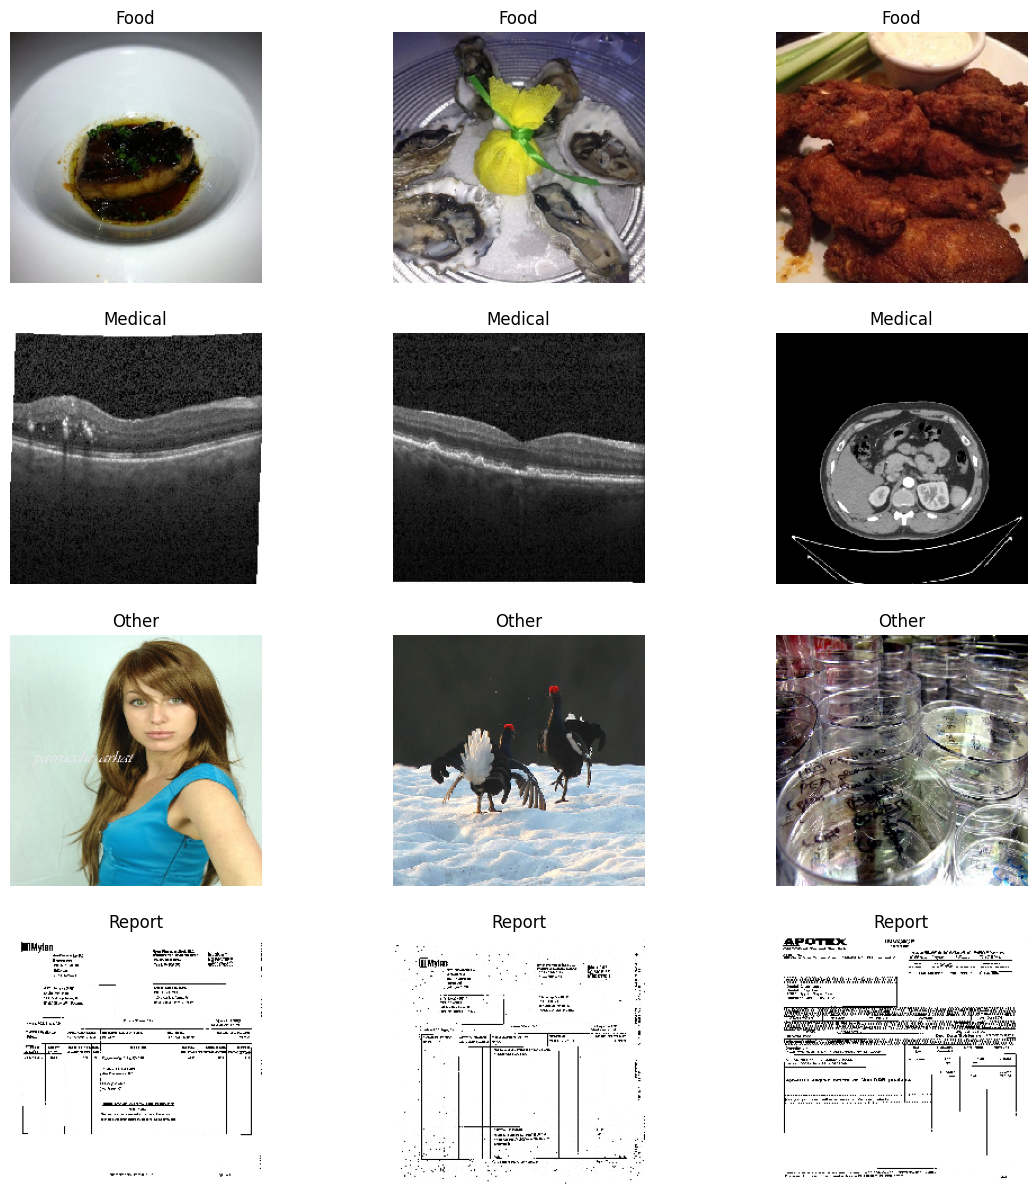

In [81]:
fig = plt.figure(figsize=(14,15))
# plt.grid=False
fig.add_subplot(4, 3, 1)
plt.axis('off')
plt.imshow(f1)
plt.title('Food')
# _______________________________
fig.add_subplot(4, 3, 2)
plt.axis('off')
plt.imshow(f2)
plt.title('Food')
# _______________________________
fig.add_subplot(4, 3, 3)
plt.axis('off')
plt.imshow(f3)
plt.title('Food')
# _______________________________
fig.add_subplot(4, 3, 4)
plt.axis('off')
plt.imshow(m1)
plt.title('Medical')
# _______________________________
fig.add_subplot(4, 3, 5)
plt.axis('off')
plt.imshow(m2)
plt.title('Medical')
# _______________________________
fig.add_subplot(4, 3, 6)
plt.axis('off')
plt.imshow(m3)
plt.title('Medical')
# _______________________________
fig.add_subplot(4, 3, 7)
plt.axis('off')
plt.imshow(o1)
plt.title('Other')
# _______________________________
fig.add_subplot(4, 3, 8)
plt.axis('off')
plt.imshow(o2)
plt.title('Other')
# _______________________________
fig.add_subplot(4, 3, 9)
plt.axis('off')
plt.imshow(o3)
plt.title('Other')
# _______________________________
fig.add_subplot(4, 3, 10)
plt.axis('off')
plt.imshow(r1)
plt.title('Report')
# _______________________________
fig.add_subplot(4, 3, 11)
plt.axis('off')
plt.imshow(r2)
plt.title('Report')
# _______________________________
fig.add_subplot(4, 3, 12)
plt.axis('off')
plt.imshow(r3)
plt.title('Report')

In [82]:
f1 = img_to_array(f1)
f2 = img_to_array(f2)
f3 = img_to_array(f3)

m1 = img_to_array(m1)
m2 = img_to_array(m2)
m3 = img_to_array(m3)

o1 = img_to_array(o1)
o2 = img_to_array(o2)
o3 = img_to_array(o3)

r1 = img_to_array(r1)
r2 = img_to_array(r2)
r3 = img_to_array(r3)

f1 = f1/255
f2 = f2/255
f3 = f3/255

m1 = m1/255
m2 = m2/255
m3 = m3/255

o1 = o1/255
o2 = o2/255
o3 = o3/255

r1 = r1/255
r2 = r2/255
r3 = r3/255

f1 = f1.reshape(1,224,224,3)
f2 = f2.reshape(1,224,224,3)
f3 = f3.reshape(1,224,224,3)

m1 = m1.reshape(1,224,224,3)
m2 = m2.reshape(1,224,224,3)
m3 = m3.reshape(1,224,224,3)

o1 = o1.reshape(1,224,224,3)
o2 = o2.reshape(1,224,224,3)
o3 = o3.reshape(1,224,224,3)

r1 = r1.reshape(1,224,224,3)
r2 = r2.reshape(1,224,224,3)
r3 = r3.reshape(1,224,224,3)

f1.shape

(1, 224, 224, 3)

In [83]:
p1 = model.predict(f1).argmax()
print("Actual: Food")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 25ms/step
Actual: Food
Predicted: Class 0: Food


In [84]:
p1 = model.predict(f2).argmax()
print("Actual: Food")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Food
Predicted: Class 0: Food


In [85]:
p1 = model.predict(f3).argmax()
print("Actual: Food")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Food
Predicted: Class 0: Food


In [86]:
p1 = model.predict(m1).argmax()
print("Actual: Medical")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Medical
Predicted: Class 1: Medical Imaging Scan


In [87]:
p1 = model.predict(m2).argmax()
print("Actual: Medical")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Medical
Predicted: Class 1: Medical Imaging Scan


In [88]:
p1 = model.predict(m3).argmax()
print("Actual: Medical")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Medical
Predicted: Class 1: Medical Imaging Scan


In [89]:
p1 = model.predict(o1).argmax()
print("Actual: Other")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Other
Predicted: Class 2: Other Unsupported Image!


In [90]:
p1 = model.predict(o2).argmax()
print("Actual: Other")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Other
Predicted: Class 2: Other Unsupported Image!


In [91]:
p1 = model.predict(o3).argmax()
print("Actual: Other")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Other
Predicted: Class 2: Other Unsupported Image!


In [92]:
p1 = model.predict(r1).argmax()
print("Actual: Report")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 19ms/step
Actual: Report
Predicted: Class 3: Medical Test Reports


In [93]:
p1 = model.predict(r2).argmax()
print("Actual: Report")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Report
Predicted: Class 3: Medical Test Reports


In [94]:
p1 = model.predict(r3).argmax()
print("Actual: Report")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Report
Predicted: Class 3: Medical Test Reports


In [95]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,food/1002160.jpg,0,0
1,food/1003804.jpg,0,2
2,food/1009028.jpg,0,0
3,food/1016491.jpg,0,0
4,food/1018015.jpg,0,0
...,...,...,...
983,report/WhatsApp Image 2023-12-23 at 19.39.06.jpeg,3,2
984,report/WhatsApp Image 2023-12-23 at 19.39.07.jpeg,3,3
985,report/WhatsApp Image 2023-12-23 at 19.39.08.jpeg,3,3
986,report/WhatsApp Image 2023-12-23 at 19.39.09.jpeg,3,3


In [96]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Heatmap

In [97]:
m = confusion_matrix(test_data.labels,yp)
m

array([[125,   0,  26,   0],
       [  2, 230,   8,   0],
       [ 15,   1, 572,   0],
       [  0,   0,   4,   5]])

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

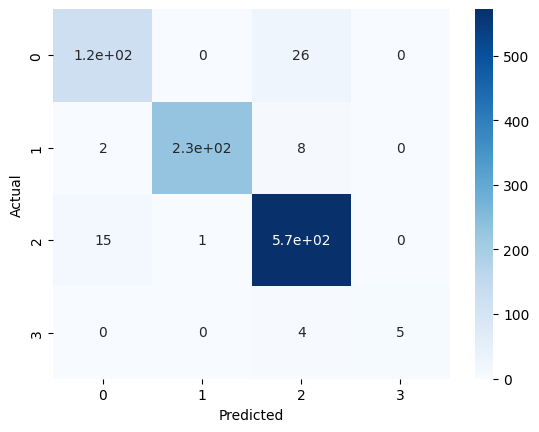

In [98]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

---

In [99]:
model.save("model_identify_image.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [100]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'model_identify_image.h5')

/kaggle/working


/kaggle/working/model_identify_image.h5

---
Convert model to tensorflow light

In [2]:
from keras.models import load_model
import tensorflow as tf

model1 = load_model('model1_image_recognition.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model1)
tflitemodel1 = converter.convert()
with open ("model1_lite.tflite",'wb') as f:
    f.write(tflitemodel1)



INFO:tensorflow:Assets written to: C:\Users\bebon\AppData\Local\Temp\tmpmvn3pjpp\assets


INFO:tensorflow:Assets written to: C:\Users\bebon\AppData\Local\Temp\tmpmvn3pjpp\assets
